# 초기화

In [229]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

#plt.rc("font", family="Malgun Gothic")
plt.rc("font", family="AppleGothic")

# 데이터로드
df = pd.read_csv("inroomdinning_Orderlist_2023-1_2023-12.csv",encoding="utf-8")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.float_format","{:,}".format)

# 데이터 전처리

In [230]:
# 공백제거
df["카테고리"]=df["카테고리"].replace(" ","")
df["카테고리"]=df["카테고리"].str.strip()
df["상품명"]=df["상품명"].replace(" ","")
df["상품명"]=df["상품명"].str.strip()

# 컬럼명 변경
df = df.rename(columns={'합계':'매출'})

df["주문 일시"] = pd.to_datetime(df["주문 일시"],format="%Y.%m.%d %H:%M:%S",errors="raise")
df["년"] = df["주문 일시"].dt.year
df["월"] = df["주문 일시"].dt.month
df["일"] = df["주문 일시"].dt.day
df["요일"] = df["주문 일시"].dt.day_of_week
#weekday_list = ['월', '화', '수', '목', '금', '토', '일']
#df['요일'] = df.apply(lambda x : weekday_list[x['요일']], axis = 1)
#df['요일_Index'] = df["주문 일시"].dt.day_of_week
df["시"] = df["주문 일시"].dt.hour
df["분"] = df["주문 일시"].dt.minute

df.head()

,ID,주문 일시,결제 금액,카테고리,상품명,상품 가격,수량,매출,년,월,일,요일,시,분
0,2311190366810549,2023-11-19 13:06:51,32000,점심/인룸다이닝,김치찌개 (점심),32000,1,32000,2023,11,19,6,13,6
1,2311190366585450,2023-11-19 13:03:06,127000,안주&후식류/ 인룸다이닝,키위 주스,14000,1,14000,2023,11,19,6,13,3
2,2311190366585450,2023-11-19 13:03:06,127000,안주&후식류/ 인룸다이닝,낙지볶음과 소면,66000,1,66000,2023,11,19,6,13,3
3,2311190366585450,2023-11-19 13:03:06,127000,점심/인룸다이닝,공기밥(점심),2000,1,2000,2023,11,19,6,13,3
4,2311190366585450,2023-11-19 13:03:06,127000,점심/인룸다이닝,한우 버섯 불고기 정식 (점심),45000,1,45000,2023,11,19,6,13,3


# (년/월/일/요일/시간대) 총 매출

## 1) 년도별 총 매출

<Axes: xlabel='년', ylabel='매출'>

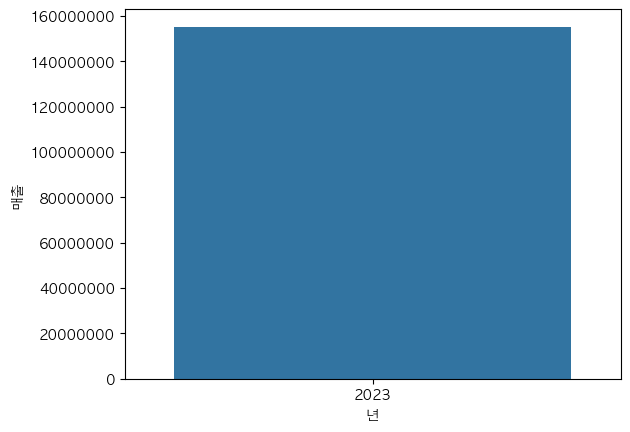

In [235]:
sum_year_total_data = pd.DataFrame(df.groupby(["년"],as_index=False)["매출"].sum())
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.barplot(x="년",y="매출",data=sum_year_total_data)

## 2) 월별 총 매출

<Axes: xlabel='월', ylabel='매출'>

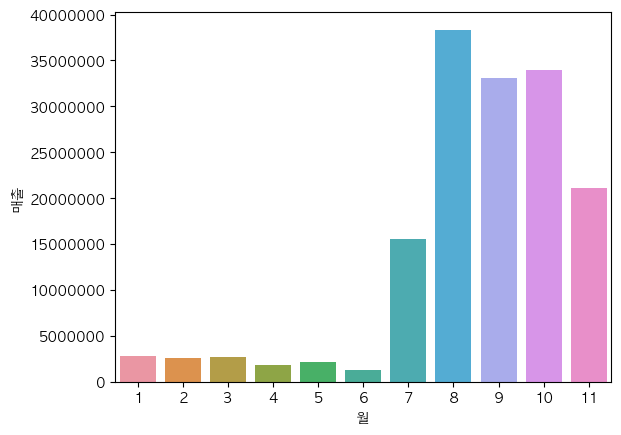

In [231]:
sum_month_total_data = pd.DataFrame(df.groupby(["월"],as_index=False)["매출"].sum())
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.barplot(x="월",y="매출",data=sum_month_total_data)

## 3) 일별 총 매출

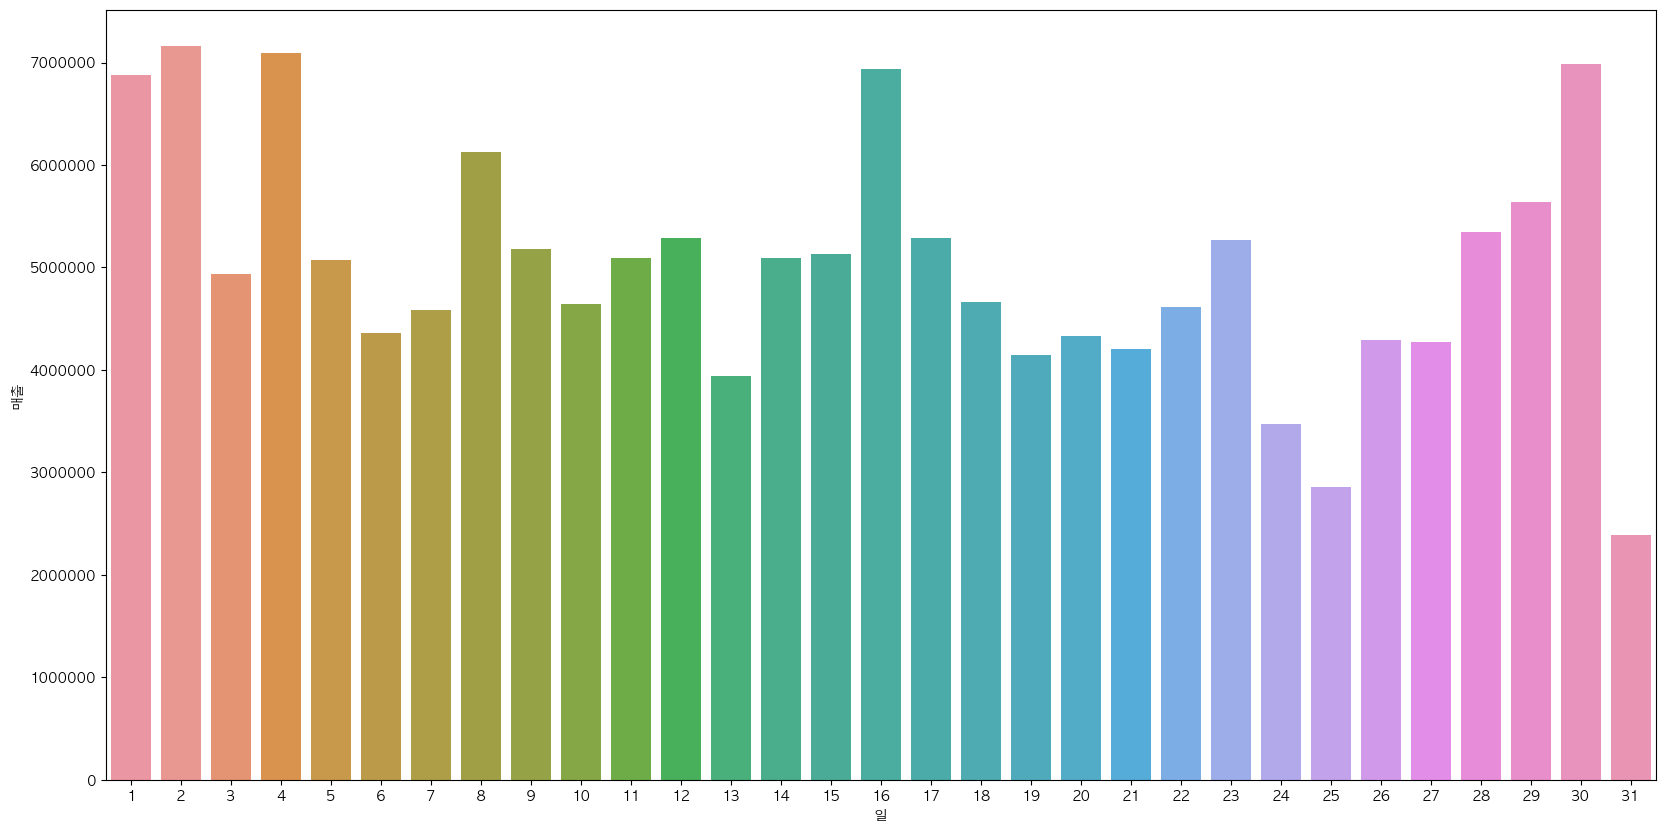

In [232]:
sum_date_total_data = pd.DataFrame(df.groupby(["일"],as_index=False)["매출"].sum())
plt.figure(figsize=(20,10))
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
p = sns.barplot(x="일",y="매출",data=sum_date_total_data)

## 4) 요일별 총 매출

<Axes: xlabel='요일', ylabel='매출'>

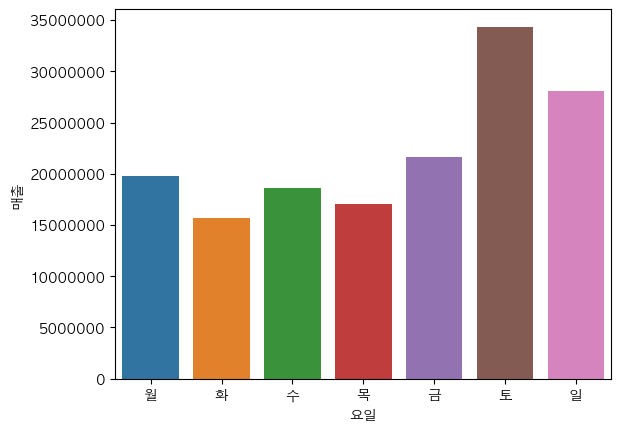

In [234]:
sum_day_total_data = pd.DataFrame(df.groupby(["요일"],as_index=False)["매출"].sum())
weekday_list = ['월', '화', '수', '목', '금', '토', '일']
sum_day_total_data['요일'] = sum_day_total_data.apply(lambda x : weekday_list[x['요일']], axis = 1)
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.barplot(x="요일",y="매출",data=sum_day_total_data)

## 5) 시간대 별 총 매출

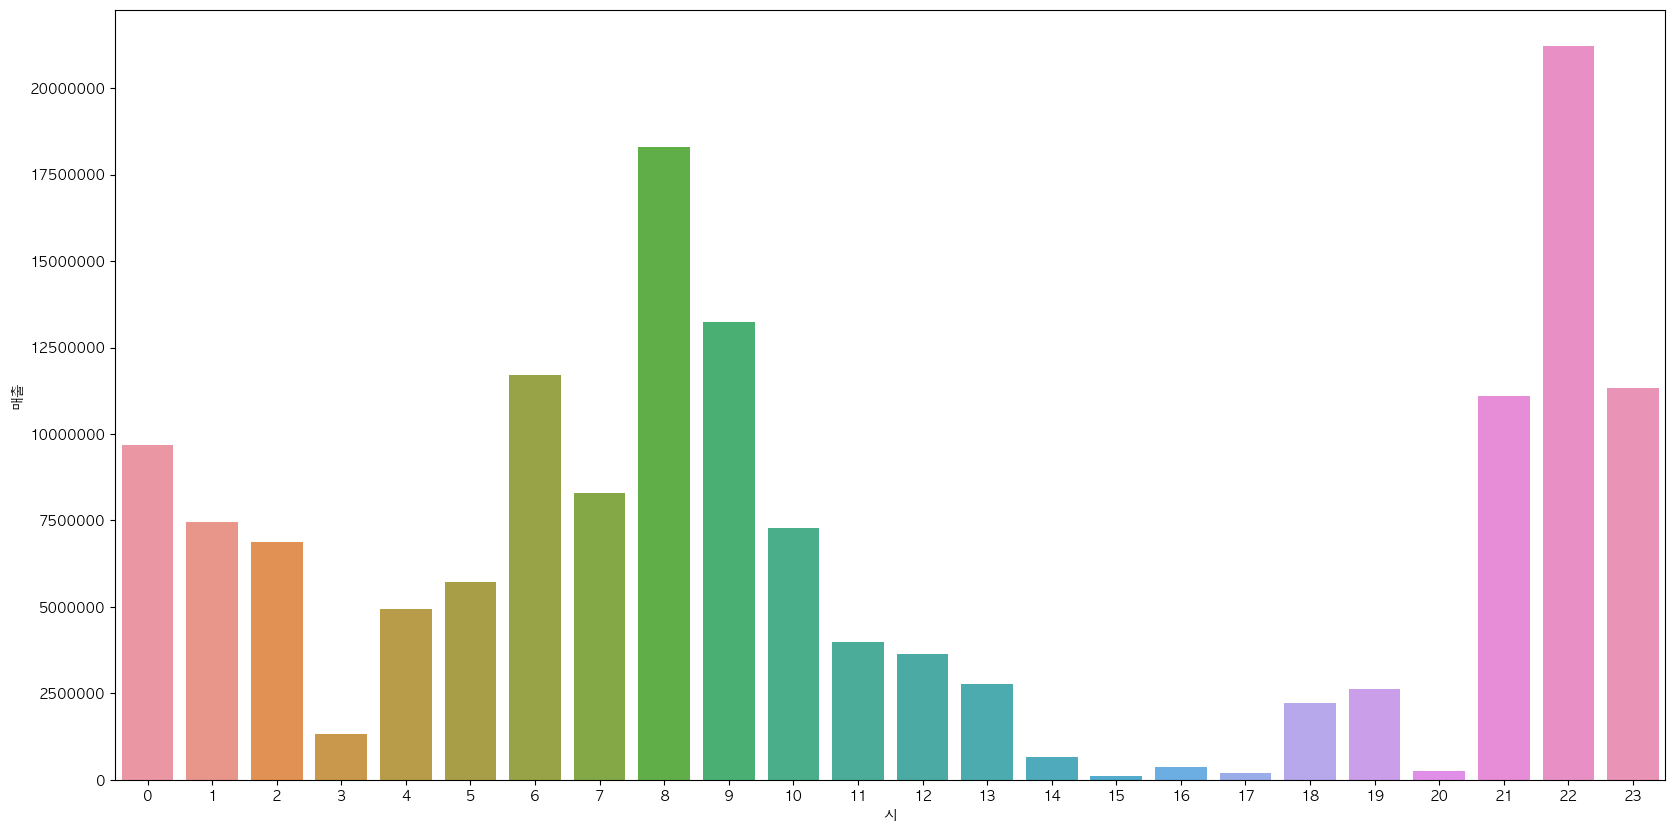

In [242]:
sum_time_total_data = pd.DataFrame(df.groupby(["시"],as_index=False)["매출"].sum())
plt.figure(figsize=(20,10))
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.barplot(x="시",y="매출",data=sum_time_total_data)
df.groupby(["시"],as_index=False)["매출"]